In [3]:
import torch

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("data/cleaned_imdb.csv")

In [6]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mention watch 1 Oz episode you ll...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically there s family little boy Jake think...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter Matteis Love Time Money visually stunni...


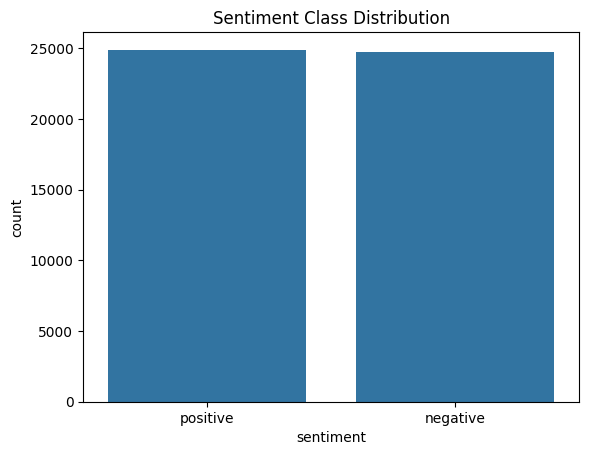

sentiment
positive    0.501876
negative    0.498124
Name: proportion, dtype: float64


In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Class Distribution')
plt.show()

class_balance = df['sentiment'].value_counts(normalize=True)
print(class_balance)

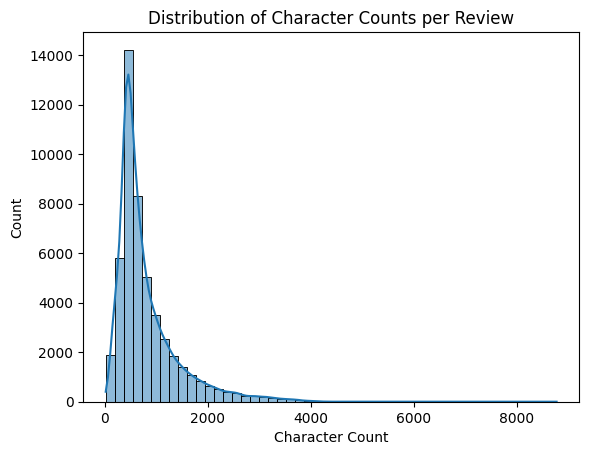

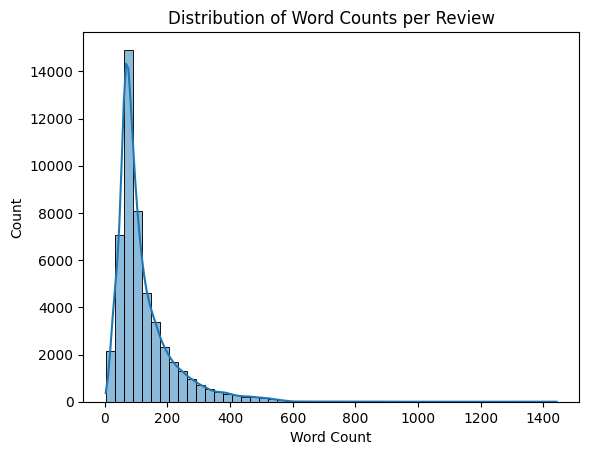

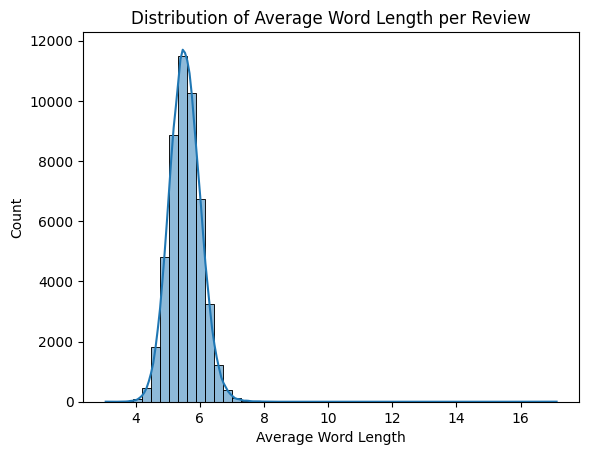

In [8]:
# Character count per review
df['char_count'] = df['cleaned_review'].apply(len)
sns.histplot(df['char_count'], bins=50, kde=True)
plt.title('Distribution of Character Counts per Review')
plt.xlabel('Character Count')
plt.show()

# Word count per review
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Counts per Review')
plt.xlabel('Word Count')
plt.show()

# Average word length per review
df['avg_word_len'] = df['cleaned_review'].apply(lambda x: np.mean([len(w) for w in x.split()]) if x.split() else 0)
sns.histplot(df['avg_word_len'], bins=50, kde=True)
plt.title('Distribution of Average Word Length per Review')
plt.xlabel('Average Word Length')
plt.show()

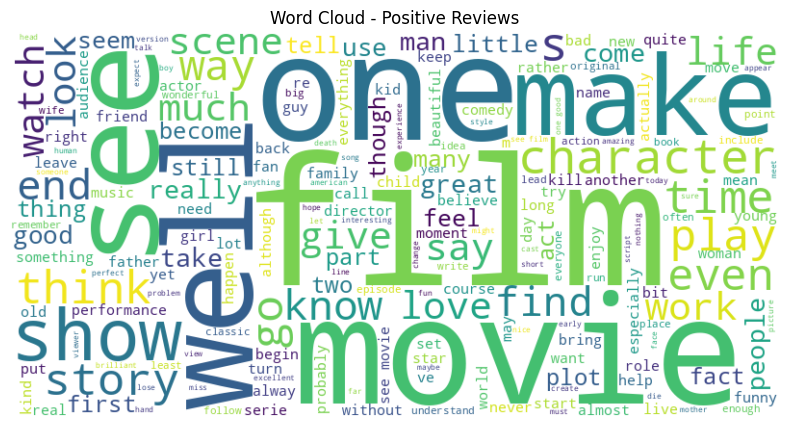

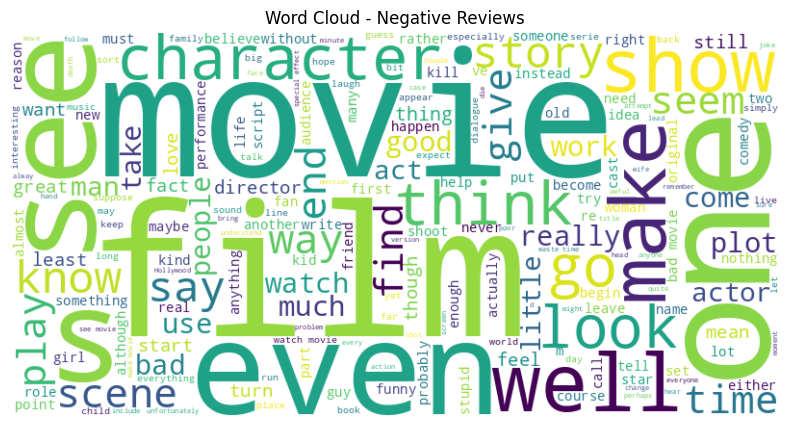

In [9]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_text = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()

# Generate word cloud for negative reviews
negative_text = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')
plt.show()

In [10]:
from collections import Counter

# Extract entire corpus from reviews
corpus = ' '.join(df['cleaned_review'])

# Compute frequency distribution of most common words

word_list = corpus.split()
word_freq = Counter(word_list)
most_common_words = word_freq.most_common(20)

print("Most common words:", most_common_words)

Most common words: [('movie', 97063), ('film', 89864), ('not', 68190), ('one', 52063), ('see', 45653), ('make', 43173), ('like', 42370), ('do', 39466), ('good', 37029), ('get', 33864), ('well', 31405), ('time', 28425), ('character', 27143), ('would', 26235), ('go', 25834), ('watch', 25675), ('s', 24437), ('even', 24075), ('bad', 23906), ('story', 23403)]


In [11]:
from collections import Counter
from nltk.util import ngrams

# Unigram frequency
pos_unigrams = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review']).split()
neg_unigrams = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review']).split()

pos_unigram_freq = Counter(pos_unigrams)
neg_unigram_freq = Counter(neg_unigrams)

print("Top 10 positive unigrams:", pos_unigram_freq.most_common(10))
print("Top 10 negative unigrams:", neg_unigram_freq.most_common(10))

# Bigram frequency
pos_bigrams = list(ngrams(pos_unigrams, 2))
neg_bigrams = list(ngrams(neg_unigrams, 2))

pos_bigram_freq = Counter(pos_bigrams)
neg_bigram_freq = Counter(neg_bigrams)

print("Top 10 positive bigrams:", pos_bigram_freq.most_common(10))
print("Top 10 negative bigrams:", neg_bigram_freq.most_common(10))

# Trigram frequency
pos_trigrams = list(ngrams(pos_unigrams, 3))
neg_trigrams = list(ngrams(neg_unigrams, 3))

pos_trigram_freq = Counter(pos_trigrams)
neg_trigram_freq = Counter(neg_trigrams)

print("Top 10 positive trigrams:", pos_trigram_freq.most_common(10))
print("Top 10 negative trigrams:", neg_trigram_freq.most_common(10))

Top 10 positive unigrams: [('film', 47956), ('movie', 42386), ('not', 27615), ('one', 26759), ('see', 24188), ('good', 20288), ('make', 19885), ('like', 19241), ('well', 16826), ('do', 16435)]
Top 10 negative unigrams: [('movie', 54677), ('film', 41908), ('not', 40575), ('one', 25304), ('make', 23288), ('like', 23129), ('do', 23031), ('see', 21465), ('bad', 19732), ('get', 18404)]
Top 10 positive bigrams: [(('do', 'not'), 13552), (('be', 'not'), 5298), (('can', 'not'), 3935), (('I', 'm'), 3590), (('I', 've'), 3020), (('that', 's'), 2857), (('he', 's'), 2671), (('there', 's'), 2254), (('see', 'movie'), 1848), (('you', 're'), 1575)]
Top 10 negative bigrams: [(('do', 'not'), 20220), (('be', 'not'), 8331), (('can', 'not'), 5541), (('I', 'm'), 5316), (('that', 's'), 4262), (('there', 's'), 3540), (('I', 've'), 3369), (('he', 's'), 2949), (('look', 'like'), 2714), (('bad', 'movie'), 2320)]
Top 10 positive trigrams: [(('do', 'not', 'know'), 1224), (('I', 've', 'see'), 1047), (('do', 'not', 't

Average review length by sentiment:
 sentiment
negative    121.551988
positive    123.352516
Name: word_count, dtype: float64
Number of unique words in corpus: 239642
Longest review:
 match 1 Tag Team Table Match Bubba Ray Spike Dudley vs Eddie Guerrero Chris Benoit Bubba Ray Spike Dudley start thing Tag Team Table Match Eddie Guerrero Chris Benoit accord rule match opponent go table order get win Benoit Guerrero heat early take turn hammer first Spike Bubba Ray german suplex Benoit Bubba take wind Dudley brother Spike try help brother referee restrain Benoit Guerrero gang corner Benoit stomp away Bubba Guerrero set table outside Spike dash ring somersault top rope onto Guerrero outside recover taking care Spike Guerrero slip table ring help Wolverine set tandem set double superplex middle rope would put Bubba table Spike knock table right brother came crash Guerrero Benoit prop another table corner try Irish Whip Spike Bubba dash block brother Bubba catch fire lift opponent back body 

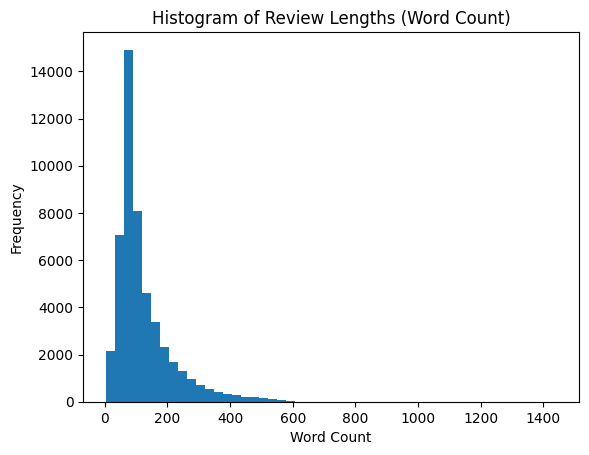

Sentiment distribution:
 sentiment
positive    24884
negative    24698
Name: count, dtype: int64


In [12]:
# Calculate average review length by sentiment
avg_review_length = df.groupby('sentiment')['word_count'].mean()
print("Average review length by sentiment:\n", avg_review_length)

# Count unique words
unique_word_count = len(set(word_list))
print("Number of unique words in corpus:", unique_word_count)

# Find longest and shortest reviews
longest_review_idx = df['word_count'].idxmax()
shortest_review_idx = df['word_count'].idxmin()
print("Longest review:\n", df.loc[longest_review_idx, 'cleaned_review'])
print("Shortest review:\n", df.loc[shortest_review_idx, 'cleaned_review'])

# Create length histogram
plt.hist(df['word_count'], bins=50)
plt.title('Histogram of Review Lengths (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Calculate sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment distribution:\n", sentiment_counts)

## Now we will dive into vectorization techniques, first one is non semantic vectorization (we'll explore bagofwords and tfidf)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
texts = df['cleaned_review'].tolist()
labels = df['sentiment'].tolist()

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# initialize CountVectorizer with limits
bow_vectorizer = CountVectorizer(
    max_features=10000,
    min_df=2,
    max_df=0.95,
    stop_words='english'
)

# fit on train, transform train + test
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# print shape info and sparsity
print(f"Bag of Words shape - train: {X_train_bow.shape}, test: {X_test_bow.shape}")

# sparsity: ratio of zero elements to total elements
def sparsity(matrix):
    total = matrix.shape[0] * matrix.shape[1]
    non_zero = matrix.count_nonzero()
    return 100 * (1 - non_zero / total)

print(f"Train sparsity: {sparsity(X_train_bow):.2f}%")
print(f"Test sparsity: {sparsity(X_test_bow):.2f}%")

# peek at some feature names
print(f"Sample features: {bow_vectorizer.get_feature_names_out()[:20]}")

# peek at vector for first training sample (non-zero entries only)
first_vector = X_train_bow[0]
print(f"Non-zero word indices in first train sample: {first_vector.indices}")
print(f"Counts for these words: {first_vector.data}")


Bag of Words shape - train: (39665, 10000), test: (9917, 10000)
Train sparsity: 99.29%
Test sparsity: 99.30%
Sample features: ['007' '010' '10' '100' '1000' '10000' '101' '1010' '11' '110' '12' '13'
 '13th' '14' '15' '150' '16' '17' '18' '180']
Non-zero word indices in first train sample: [   2  805 1453 1766 1844 2108 2787 2806 2822 3715 4027 4367 5109 5196
 5311 5329 5673 5998 6146 6641 7288 7370 7385 7590 7819 7982 8577 8749
 8769 9084 9696 9723 9736 9825 9930]
Counts for these words: [2 1 2 1 1 1 1 1 1 3 2 1 1 1 4 3 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize tf-idf vectorizer with same limits
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,
    min_df=2,
    max_df=0.95,
    stop_words='english'
)

# fit and transform train + test
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# print shape info and sparsity
print(f"TF-IDF shape - train: {X_train_tfidf.shape}, test: {X_test_tfidf.shape}")

print(f"Train sparsity: {sparsity(X_train_tfidf):.2f}%")
print(f"Test sparsity: {sparsity(X_test_tfidf):.2f}%")

# peek at some feature names
print(f"Sample features: {tfidf_vectorizer.get_feature_names_out()[:20]}")

# peek at tf-idf vector for first training sample (non-zero entries only)
first_vector = X_train_tfidf[0]
print(f"Non-zero indices: {first_vector.indices}")
print(f"TF-IDF values: {first_vector.data}")


TF-IDF shape - train: (39665, 10000), test: (9917, 10000)
Train sparsity: 99.29%
Test sparsity: 99.30%
Sample features: ['007' '010' '10' '100' '1000' '10000' '101' '1010' '11' '110' '12' '13'
 '13th' '14' '15' '150' '16' '17' '18' '180']
Non-zero indices: [   2  805 1453 1766 1844 2108 2787 2806 2822 3715 4027 4367 5109 5196
 5311 5329 5673 5998 6146 6641 7288 7370 7385 7590 7819 7982 8577 8749
 8769 9084 9696 9723 9736 9825 9930]
TF-IDF values: [0.21525322 0.06627384 0.29943355 0.15679833 0.07191586 0.11129617
 0.20070229 0.20293676 0.16934377 0.27401839 0.45527291 0.11276298
 0.06923651 0.10052614 0.20564843 0.28908612 0.10620988 0.17219534
 0.18335304 0.07160968 0.06555776 0.16382652 0.18099626 0.09503798
 0.06861537 0.12972408 0.13396602 0.16424322 0.1116146  0.05803521
 0.0778008  0.06050228 0.07147461 0.11338574 0.09444728]


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# logistic regression for bow
model_bow = LogisticRegression(max_iter=1000)
model_bow.fit(X_train_bow, y_train)
pred_bow = model_bow.predict(X_test_bow)
acc_bow = accuracy_score(y_test, pred_bow)

# logistic regression for tfidf
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)
pred_tfidf = model_tfidf.predict(X_test_tfidf)
acc_tfidf = accuracy_score(y_test, pred_tfidf)

print(f"Accuracy with Bag of Words: {acc_bow:.4f}")
print(f"Accuracy with TF-IDF: {acc_tfidf:.4f}")


Accuracy with Bag of Words: 0.8660
Accuracy with TF-IDF: 0.8813


## Alright now we are implementing glove (pretrained embeddings)

In [26]:
%pip install wget

import os
import wget
import zipfile

glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip = "glove.6B.zip"

if not os.path.exists(glove_zip):
    print("downloading glove embeddings...")
    wget.download(glove_url)

if not os.path.exists("glove.6B.300d.txt"):
    print("\nunzipping glove embeddings...")
    with zipfile.ZipFile(glove_zip, 'r') as zip_ref:
        zip_ref.extractall(".")
print("glove ready.")


  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'wget' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'wget'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9685 sha256=7c4243ff7a4dea560422eca8787e16fe0bbb1fd3d719d622c6d8be610979222d
  Stored in directory: /home/sam/.cache/pip/wheels/8a/b8/04/0c88fb22489b0c049bee4e977c5689c7fe597d6c4b0e7d0b6a
Successfully built wget
Note: you may need to restart the kernel to use updated packages.
downloading glove embeddings...

unzipping glove embeddings...
glove ready.


In [27]:
glove_path = "glove.6B.300d.txt"
embedding_dim = 300

print("loading glove vectors...")

glove_dict = {}
with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = list(map(float, values[1:]))
        glove_dict[word] = vector

print(f"loaded {len(glove_dict)} word vectors from glove.")


loading glove vectors...
loaded 400000 word vectors from glove.


In [28]:
from collections import Counter
import numpy as np

# build vocab from training texts with limits like before
def build_vocab(texts, max_features=10000, min_freq=2):
    all_words = []
    for text in texts:
        all_words.extend(text.split())
    freq = Counter(all_words)
    vocab = {word: idx+1 for idx, (word, count) in enumerate(freq.most_common(max_features)) if count >= min_freq}
    # idx+1 because reserve 0 for padding/oov
    return vocab

vocab = build_vocab(X_train, max_features=10000, min_freq=2)
print(f"vocab size: {len(vocab)}")

# create embedding matrix (vocab_size+1, embedding_dim)
embedding_matrix = np.zeros((len(vocab)+1, embedding_dim))

oov_count = 0
for word, idx in vocab.items():
    vector = glove_dict.get(word)
    if vector is not None:
        embedding_matrix[idx] = vector
    else:
        oov_count += 1
        # keep zero vector for OOV

print(f"oov words (no glove vector): {oov_count}")


vocab size: 10000
oov words (no glove vector): 2972


In [29]:
np.save('glove_embedding_matrix.npy', embedding_matrix)

In [30]:
# Convert each review to a GloVe embedding (average of word vectors)
def text_to_glove_embedding(text, glove_dict, embedding_dim):
    vectors = [glove_dict.get(word) for word in text.split() if glove_dict.get(word) is not None]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(embedding_dim)

# Prepare GloVe embeddings for all reviews
texts = df['cleaned_review'].tolist()
X_glove = np.array([text_to_glove_embedding(text, glove_dict, embedding_dim) for text in texts])
print(f"GloVe embedding shape: {X_glove.shape}")

GloVe embedding shape: (49582, 300)


In [31]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])
print(f"Label classes: {le.classes_}")

from sklearn.model_selection import train_test_split
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X_glove, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_glove = LogisticRegression(max_iter=1000)
model_glove.fit(X_train_glove, y_train_glove)
y_pred_glove = model_glove.predict(X_test_glove)

acc_glove = accuracy_score(y_test_glove, y_pred_glove)
print(f"Accuracy with GloVe embeddings: {acc_glove:.4f}")
print(classification_report(y_test_glove, y_pred_glove, target_names=le.classes_))

Label classes: ['negative' 'positive']
Accuracy with GloVe embeddings: 0.8341
              precision    recall  f1-score   support

    negative       0.84      0.83      0.83      4939
    positive       0.83      0.84      0.84      4978

    accuracy                           0.83      9917
   macro avg       0.83      0.83      0.83      9917
weighted avg       0.83      0.83      0.83      9917



In [33]:
# Example: Test the model on a custom review
test_review = "This is so bad"
test_vec = text_to_glove_embedding(test_review, glove_dict, embedding_dim).reshape(1, -1)
pred_label = model_glove.predict(test_vec)
print(f"Predicted sentiment: {le.inverse_transform(pred_label)[0]}")

Predicted sentiment: negative
